In [172]:
import numpy as np
import seaborn as sns
import pandas as pd
train = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/train.csv")
test = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/test.csv")
submission = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/submission_sample.csv")
bus = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/bus_bts.csv")

In [147]:
import matplotlib.pyplot as plt
import warnings

In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
id               415423 non-null int64
date             415423 non-null object
bus_route_id     415423 non-null int64
in_out           415423 non-null object
station_code     415423 non-null int64
station_name     415423 non-null object
latitude         415423 non-null float64
longitude        415423 non-null float64
6~7_ride         415423 non-null float64
7~8_ride         415423 non-null float64
8~9_ride         415423 non-null float64
9~10_ride        415423 non-null float64
10~11_ride       415423 non-null float64
11~12_ride       415423 non-null float64
6~7_takeoff      415423 non-null float64
7~8_takeoff      415423 non-null float64
8~9_takeoff      415423 non-null float64
9~10_takeoff     415423 non-null float64
10~11_takeoff    415423 non-null float64
11~12_takeoff    415423 non-null float64
18~20_ride       415423 non-null float64
dtypes: float64(15), int64(3), object

In [175]:
train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


In [149]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
train.loc[train['18~20_ride'].idxmax()]

id                      190528
date                2019-09-15
bus_route_id          23620000
in_out                      시내
station_code               638
station_name     제주국제공항(구제주방면)
latitude               33.5066
longitude              126.493
6~7_ride                     3
7~8_ride                    31
8~9_ride                    32
9~10_ride                   49
10~11_ride                  36
11~12_ride                  41
6~7_takeoff                  6
7~8_takeoff                 14
8~9_takeoff                 20
9~10_takeoff                11
10~11_takeoff                8
11~12_takeoff                8
18~20_ride                 272
Name: 190528, dtype: object

In [151]:
train.groupby("18~20_ride").size().head(5) 

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
dtype: int64

In [152]:
train1 = train.copy() ## 복사본

In [153]:
train1['date'] = pd.to_datetime(train1['date'])

In [154]:
train1['weekday'] = train1['date'].dt.strftime('%a')

In [155]:
train1

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sun
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sun
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sun
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,Sun
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sun
5,5,2019-09-01,4270000,시내,1648,예래입구,33.25862,126.40442,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Sun
6,6,2019-09-01,4270000,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,Sun
7,7,2019-09-01,4270000,시외,1666,창천리,33.26598,126.37082,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Sun
8,8,2019-09-01,4270000,시외,1726,강정농협,33.23603,126.47827,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,Sun
9,9,2019-09-01,4270000,시내,2008,서귀포항,33.23977,126.56450,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,Sun


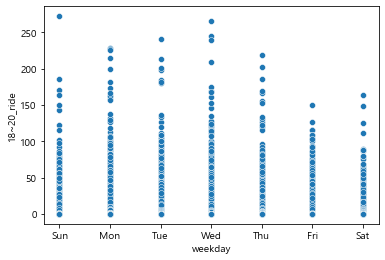

In [156]:
sns.scatterplot(x=train1['weekday'],
                y=train1['18~20_ride'])

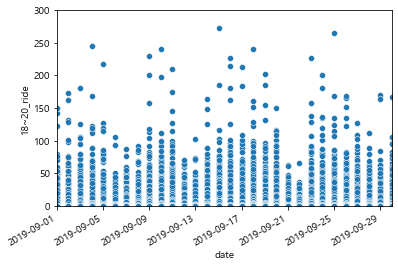

In [157]:
sns.scatterplot(x=train1['date'],
                y=train1['18~20_ride'])

plt.xlim('2019-09-01','2019-09-30')
plt.ylim(0,300)
plt.gcf().autofmt_xdate()
plt.show()

In [158]:
train1['7~9_ride'] = train1['7~8_ride'] + train1['8~9_ride']
ride = train1.groupby('date')[['18~20_ride','7~9_ride']].agg('sum')
ride.reset_index(inplace=True)

In [159]:
ride

,date,18~20_ride,7~9_ride
0,2019-09-01,11537.0,10200.0
1,2019-09-02,20561.0,26119.0
2,2019-09-03,19743.0,29868.0
3,2019-09-04,20133.0,27564.0
4,2019-09-05,20392.0,30710.0
5,2019-09-06,8162.0,28522.0
6,2019-09-07,12389.0,7215.0
7,2019-09-08,10306.0,9922.0
8,2019-09-09,20135.0,27829.0
9,2019-09-10,22805.0,32562.0


In [160]:
plt.rcParams['font.family'] = 'Malgun Gothic'

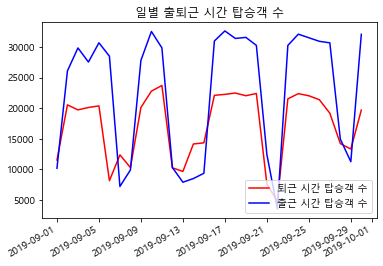

In [161]:
plt.plot('date','18~20_ride','r',label = '퇴근 시간 탑승객 수', data = ride)
plt.plot('date','7~9_ride','b', label = "출근 시간 탑승객 수", data = ride)
plt.gcf().autofmt_xdate() 
plt.legend(loc=4) 
plt.title('일별 출퇴근 시간 탑승객 수')
plt.show()

In [162]:
weekday = ['Mon', 'Tue', 'Wed', 'Tue', 'Fri', 'Sat', 'Sun']
train1['7~9_ride'] = train1['7~8_ride'] + train1['8~9_ride']
ride = train1.groupby('weekday')[['18~20_ride','7~9_ride']].agg('sum').reindex(weekday)
ride.reset_index(inplace=True)


In [163]:
ride

,weekday,18~20_ride,7~9_ride
0,Mon,104073.0,147325.0
1,Tue,87220.0,127198.0
2,Wed,88404.0,120395.0
3,Tue,87220.0,127198.0
4,Fri,59451.0,97434.0
5,Sat,48419.0,43167.0
6,Sun,54306.0,44302.0


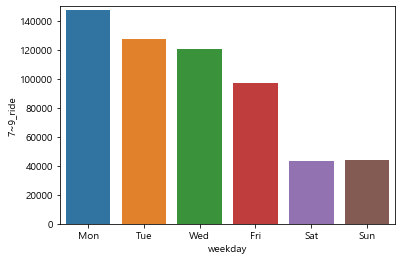

In [164]:
sns.barplot(x = 'weekday',y='7~9_ride', data = ride)
plt.ylim(0,150000)
plt.show()

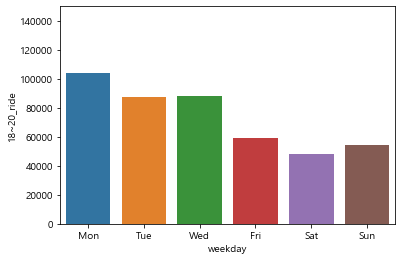

In [165]:
sns.barplot(x='weekday', y = '18~20_ride', data = ride)
plt.ylim(0,150000)
plt.show()

In [166]:
test

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,415428,2019-10-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,415429,2019-10-01,4270000,시내,1648,예래입구,33.25862,126.40442,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,415430,2019-10-01,4270000,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,2.0,0.0,1.0
8,415431,2019-10-01,4270000,시외,1662,씨에스호텔,33.24362,126.42032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,415432,2019-10-01,4270000,시외,1666,창천리,33.26598,126.37082,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 20 columns):
id               228170 non-null int64
date             228170 non-null object
bus_route_id     228170 non-null int64
in_out           228170 non-null object
station_code     228170 non-null int64
station_name     228170 non-null object
latitude         228170 non-null float64
longitude        228170 non-null float64
6~7_ride         228170 non-null float64
7~8_ride         228170 non-null float64
8~9_ride         228170 non-null float64
9~10_ride        228170 non-null float64
10~11_ride       228170 non-null float64
11~12_ride       228170 non-null float64
6~7_takeoff      228170 non-null float64
7~8_takeoff      228170 non-null float64
8~9_takeoff      228170 non-null float64
9~10_takeoff     228170 non-null float64
10~11_takeoff    228170 non-null float64
11~12_takeoff    228170 non-null float64
dtypes: float64(14), int64(3), object(3)
memory usage: 34.8+ MB


In [168]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [180]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
user_card_id           float64
bus_route_id           int64
vhc_id                 int64
geton_date             object
geton_time             object
geton_station_code     int64
geton_station_name     object
getoff_date            object
getoff_time            object
getoff_station_code    float64
getoff_station_name    object
user_category          int64
user_count             int64
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [181]:
bus.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [179]:
bus.groupby('user_category').size()

user_category
1     1463495
2       36526
4      279779
6      473325
27      73042
28      67913
29      15243
30         91
dtype: int64